In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

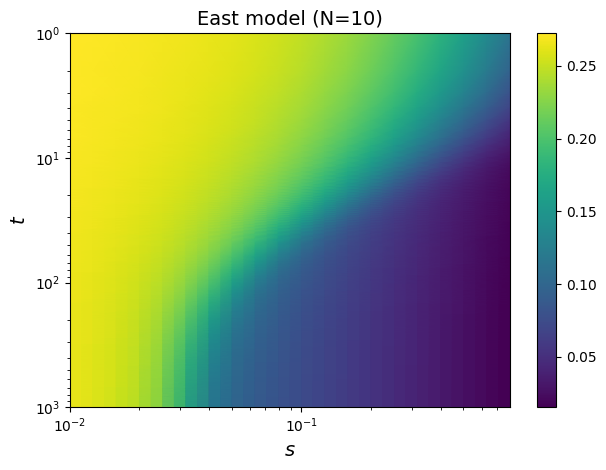

In [2]:
c = 0.5  # equilibrium parameter
N = 10  # system size
t = 1000  # evolution time
dt = 0.1  # delta t
steps = int(t / dt)  # number of Trotter steps
logs = np.linspace(-2, 0, 21)
s = 10**logs

logZts = np.zeros((21, steps))

for i, logs in enumerate(np.linspace(-2, 0, 21)):
    path = f"./out/exact/1d_east_c0.50_N10_t1000_dt0.10/logs{logs:.2f}/output.txt"
    data = np.loadtxt(path)
    logZts[i, :] = data[:, 2]

logZts = logZts[:, 9::10]  # only keep every (1//dt) step

kst = np.zeros((20, t))
t_arr = np.linspace(1, t, t)

for i in range(20):
    kst[i, :] = -1 / N * (logZts[i + 1, :] - logZts[i, :]) / (s[i + 1] - s[i]) / t_arr

kwargs_dict = {"fontsize": 14}
fig, ax = plt.subplots()
pcm = ax.pcolormesh(s[:-1], t_arr, kst.T, cmap="viridis", shading="gouraud")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$s$", **kwargs_dict)
ax.set_ylabel(r"$t$", **kwargs_dict)
ax.set_title("East model (N=10)", **kwargs_dict)
plt.gca().invert_yaxis()
fig.colorbar(pcm, ax=ax)
fig.tight_layout()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")
%matplotlib inline

In [4]:
logZ_exact = np.loadtxt("./out/exact/1d_east_c0.50_N10_t1000_dt0.10/logs-1.00/output.txt")[:, 1]
logZts_exact = np.loadtxt("./out/exact/1d_east_c0.50_N10_t1000_dt0.10/logs-1.00/output.txt")[:, 2]

logZ_reinforce = np.loadtxt("./out/reinforce_nade_n10_seed1_h64_logs-1/output.txt")[:, 1]
logZts_reinforce = np.loadtxt("./out/reinforce_nade_n10_seed1_h64_logs-1/output.txt")[:, 2]
time_reinforce = np.loadtxt("./out/reinforce_nade_n10_seed1_h64_logs-1/output.txt")[1:, 3]

logZ_ng = np.loadtxt("./out/natural_grad_nade_n10_seed1_h64_logs-1/output.txt")[:, 1]
logZts_ng = np.loadtxt("./out/natural_grad_nade_n10_seed1_h64_logs-1/output.txt")[:, 2]
time_ng = np.loadtxt("./out/natural_grad_nade_n10_seed1_h64_logs-1/output.txt")[1:, 3]

In [5]:
logZ_exact = logZ_exact[9:1000:10]
logZts_exact = logZts_exact[9:1000:10]
logZ_reinforce = logZ_reinforce[9:1000:10]
logZts_reinforce = logZts_reinforce[9:1000:10]
logZ_ng = logZ_ng[9:1000:10]
logZts_ng = logZts_ng[9:1000:10]

In [6]:
rel_err_logZ_reinforce = np.abs(logZ_reinforce - logZ_exact) / np.abs(logZ_exact)
rel_err_logZts_reinforce = np.abs(logZts_reinforce - logZts_exact) / np.abs(logZts_exact)

rel_err_logZ_ng = np.abs(logZ_ng - logZ_exact) / np.abs(logZ_exact)
rel_err_logZts_ng = np.abs(logZts_ng - logZts_exact) / np.abs(logZts_exact)

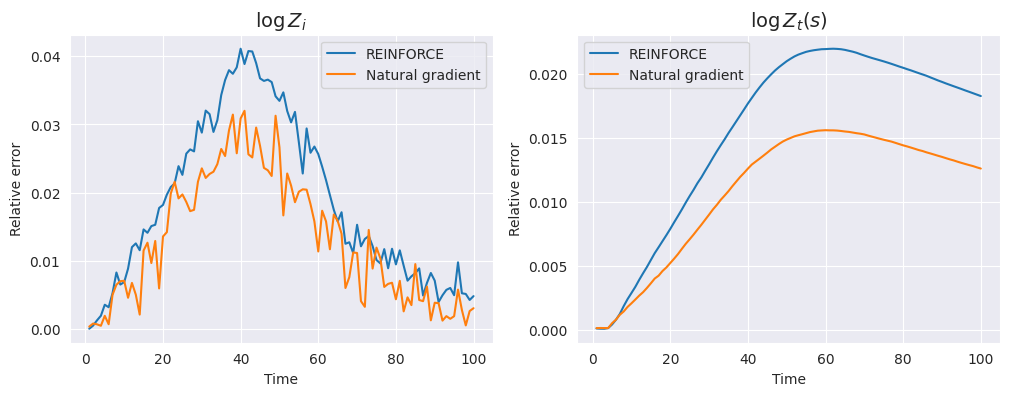

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
step = np.linspace(1, 100, 100)
axes[0].plot(step, rel_err_logZ_reinforce, label="REINFORCE")
axes[0].plot(step, rel_err_logZ_ng, label="Natural gradient")
axes[1].plot(step, rel_err_logZts_reinforce, label="REINFORCE")
axes[1].plot(step, rel_err_logZts_ng, label="Natural gradient")
axes[0].set_title(r"$\log Z_i$", fontsize=14)
axes[1].set_title(r"$\log Z_{t}(s)$", fontsize=14)
for ax in axes:
    ax.set_xlabel("Time")
    ax.set_ylabel("Relative error")
    ax.legend()
    # ax.set_yscale("log")

In [8]:
print(f"REINFORCE per step: {time_reinforce.mean():.2f}s,\nNatural gradient per step: {time_ng.mean():.2f}s")

REINFORCE per step: 5.24s,
Natural gradient per step: 0.86s
